# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [3]:
# iris = load_iris()
# data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data = pd.read_csv('iris-dataset.csv')
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# data.columns = ['sepal_length','sepal_width','petal_length','petal_width']
# data.describe()

## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

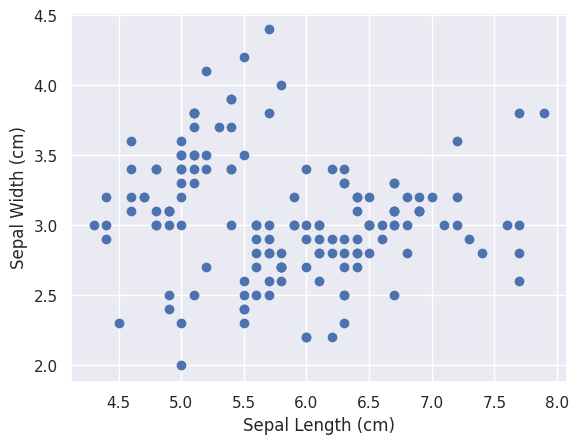

In [5]:
# x = data.iloc[:,0:2]
x = data.copy()
plt.scatter(x['sepal_length'], x['sepal_width'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [7]:
# use predict not for the same x but for new, unseen data. 
# if same x is used, then you will obtain same results as kmeans.labels_
kmeans.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
x_cluster = x.copy()
x_cluster['clusters'] = kmeans.labels_

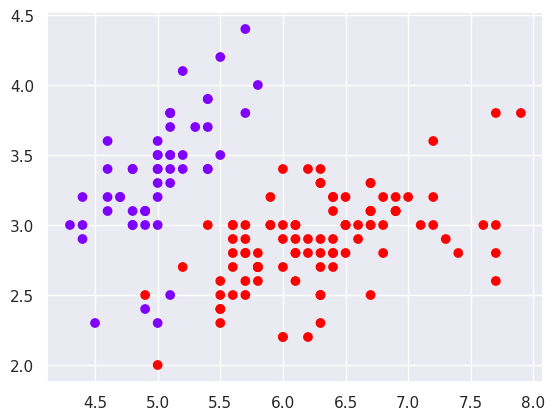

In [9]:
plt.scatter(x_cluster['sepal_length'], x_cluster['sepal_width'], c=x_cluster['clusters'], cmap='rainbow')

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [10]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled_df = pd.DataFrame(data=x_scaled, columns=[x.columns.values])
x_scaled_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


# Clustering (scaled data)

In [12]:
# random_state = 42, init=random
# kmeans_scaled = KMeans(3)
kmeans_scaled = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, 
                               verbose=1,
                               random_state = 42)
kmeans_scaled.fit(x_scaled_df)

Initialization complete
Iteration 0, inertia 242.39276675619303.
Iteration 1, inertia 141.9808618590733.
Iteration 2, inertia 141.14035282762873.
Iteration 3, inertia 141.00493595695602.
Iteration 4, inertia 140.96581663074699.
Converged at iteration 4: strict convergence.


KMeans(max_iter=100, n_clusters=3, n_init=1, random_state=42, verbose=1)

In [13]:
x_scaled_df_clustered = x.copy()
x_scaled_df_clustered['cluster'] = kmeans_scaled.labels_

In [14]:
x_scaled_df_clustered.describe()

,sepal_length,sepal_width,petal_length,petal_width,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.040000
std,0.828066,0.433594,1.764420,0.763161,0.818248
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
cent = scaler.inverse_transform(kmeans_scaled.cluster_centers_)
kmeans_scaled.cluster_centers_
# array([[-0.97822861,  0.89321545],
#        [-0.05899721, -0.90181041],
#        [ 1.18671078,  0.13274116]])

# array([[ 1.09616533,  0.09718925],
#        [-0.11190209, -0.95528589],
#        [-1.00206653,  0.89510445]])

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

Text(0, 0.5, 'sepal_width')

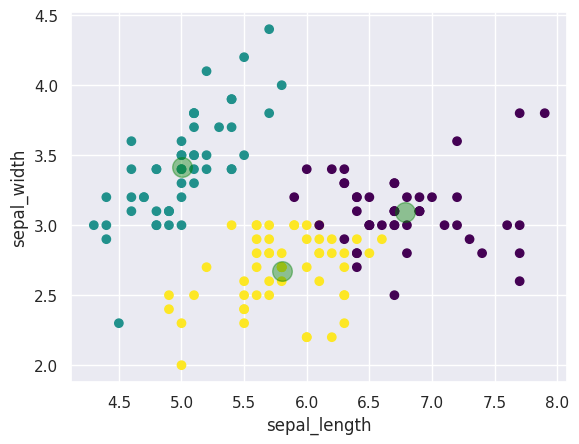

In [16]:
plt.scatter(x_scaled_df_clustered['sepal_length'],x_scaled_df_clustered['sepal_width'], 
            c= x_scaled_df_clustered['cluster'], cmap='viridis' )
plt.scatter(cent[:,0], cent[:,1], c='green', alpha=0.4, s=200)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

## Take Advantage of the Elbow Method

### WCSS

In [17]:
kmeans_scaled.inertia_

140.965816630747

### The Elbow Method

In [18]:
wcss = []
clusters = 10
for i in range(1,clusters+1):
    kmeans_itr = KMeans(i)
    kmeans_itr.fit(x_scaled_df)
    wcss.append(kmeans_itr.inertia_)
wcss


[600.0,
 223.73200573676345,
 140.965816630747,
 114.57790500611006,
 91.06677122728536,
 80.1853921141584,
 71.96800639132668,
 62.64100835118804,
 55.68617319974258,
 48.97922236459927]

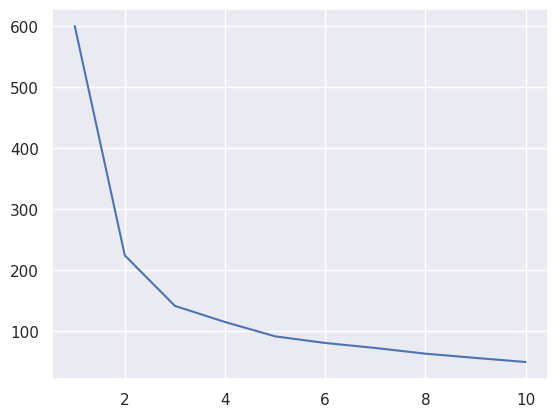

In [19]:
plt.plot(range(1,11), wcss)

How many clusters are there?